In [ ]:
library(dplyr)
library(readr)

In [ ]:
if(!require(car)){install.packages("car")}
if(!require(sandwich)){install.packages("sandwich")}
if(!require(lmtest)){install.packages("lmtest")}

In [ ]:
loaded_objects <- load("/content/hh_ind1.rda")
print(loaded_objects)

[1] "hh_ind"


In [ ]:
ind <- hh_ind

In [ ]:
ind <- ind %>%
  select(-IDHH,-female_count,-female_edu_exp)

In [ ]:
head(ind)

,HH_INCOME,URBAN2011,ASSETS,NCHILD,SCHOOL_DIST,STANDARD,FEES_BY_GOVT_DUMMY,SCHOLARSHIP,ind_edu_exp,HHEDUCF_YEARS,HHEDUCM_YEARS,RELIGION_MUSLIM,RELIGION_CHRISTIAN_SIKH,RELIGION_OTHER,CASTE_GENERAL,CASTE_SC_ST_OTHERS,SCHOOL_PRIVATE,SCHOOL_GOVT_AIDED
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176100,0,20,5,3,6,0,0,10600,8,9,1,0,0,0,0,1,0
2,176100,0,20,5,3,0,0,0,2800,8,9,1,0,0,0,0,1,0
3,182340,0,22,4,3,10,0,0,3900,11,10,1,0,0,0,0,1,0
4,182340,0,22,4,3,5,0,0,2680,11,10,1,0,0,0,0,1,0
5,90760,0,16,3,3,8,0,0,1150,0,0,1,0,0,1,0,0,0
6,152100,0,12,4,1,0,0,0,220,9,0,1,0,0,0,0,0,0


In [ ]:
# save(hh_ind, file = "ind.rda")

In [ ]:
 ind <- ind %>%
  filter(HH_INCOME > 0)

In [ ]:
ind$SCHOLARSHIP_dummy <- ifelse(ind$SCHOLARSHIP > 0, 1, 0)

In [ ]:
cap_value <- quantile(ind$HH_INCOME, 0.98, na.rm = TRUE)
ind <- ind %>% mutate(HH_INCOME = ifelse(HH_INCOME > cap_value, cap_value, HH_INCOME))

In [ ]:
nrow(ind)

[1] 21036

In [ ]:
model <- lm(ind_edu_exp ~  HH_INCOME+URBAN2011 +ASSETS+SCHOOL_DIST+ STANDARD+
               HHEDUCF_YEARS + SCHOLARSHIP_dummy +
            HHEDUCM_YEARS + RELIGION_MUSLIM +
             RELIGION_CHRISTIAN_SIKH +RELIGION_OTHER + SCHOOL_PRIVATE +SCHOOL_GOVT_AIDED
             +CASTE_GENERAL+ CASTE_SC_ST_OTHERS, data = ind)

summary(model)


Call:
lm(formula = ind_edu_exp ~ HH_INCOME + URBAN2011 + ASSETS + SCHOOL_DIST + 
    STANDARD + HHEDUCF_YEARS + SCHOLARSHIP_dummy + HHEDUCM_YEARS + 
    RELIGION_MUSLIM + RELIGION_CHRISTIAN_SIKH + RELIGION_OTHER + 
    SCHOOL_PRIVATE + SCHOOL_GOVT_AIDED + CASTE_GENERAL + CASTE_SC_ST_OTHERS, 
    data = ind)

Residuals:
   Min     1Q Median     3Q    Max 
-34012  -2394   -357   1368 215062 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -3.703e+03  1.393e+02 -26.587  < 2e-16 ***
HH_INCOME                7.324e-03  3.906e-04  18.751  < 2e-16 ***
URBAN2011                1.117e+03  9.946e+01  11.231  < 2e-16 ***
ASSETS                   1.098e+02  9.726e+00  11.292  < 2e-16 ***
SCHOOL_DIST              3.388e+02  1.041e+01  32.561  < 2e-16 ***
STANDARD                 2.722e+02  1.204e+01  22.602  < 2e-16 ***
HHEDUCF_YEARS            1.665e+02  9.551e+00  17.437  < 2e-16 ***
SCHOLARSHIP_dummy       -4.024e+02  1.023e+02  -3.933 8

In [ ]:
# multicollinearity test for model
library(car)


vif_values <- vif(model)
print(vif_values)
high_vif_variables <- names(vif_values[vif_values > 5])

if (length(high_vif_variables) > 0) {
  cat("Variables with high VIFs (potential multicollinearity):\n")
  print(high_vif_variables)
} else {
  cat("No variables with high VIFs detected.\n")
}

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




              HH_INCOME               URBAN2011                  ASSETS 
               1.512953                1.362601                2.402472 
            SCHOOL_DIST                STANDARD           HHEDUCF_YEARS 
               1.077118                1.157211                1.854963 
      SCHOLARSHIP_dummy           HHEDUCM_YEARS         RELIGION_MUSLIM 
               1.166904                1.644720                1.120601 
RELIGION_CHRISTIAN_SIKH          RELIGION_OTHER          SCHOOL_PRIVATE 
               1.064505                1.021564                1.423610 
      SCHOOL_GOVT_AIDED           CASTE_GENERAL      CASTE_SC_ST_OTHERS 
               1.077108                1.294280                1.335903 
No variables with high VIFs detected.


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


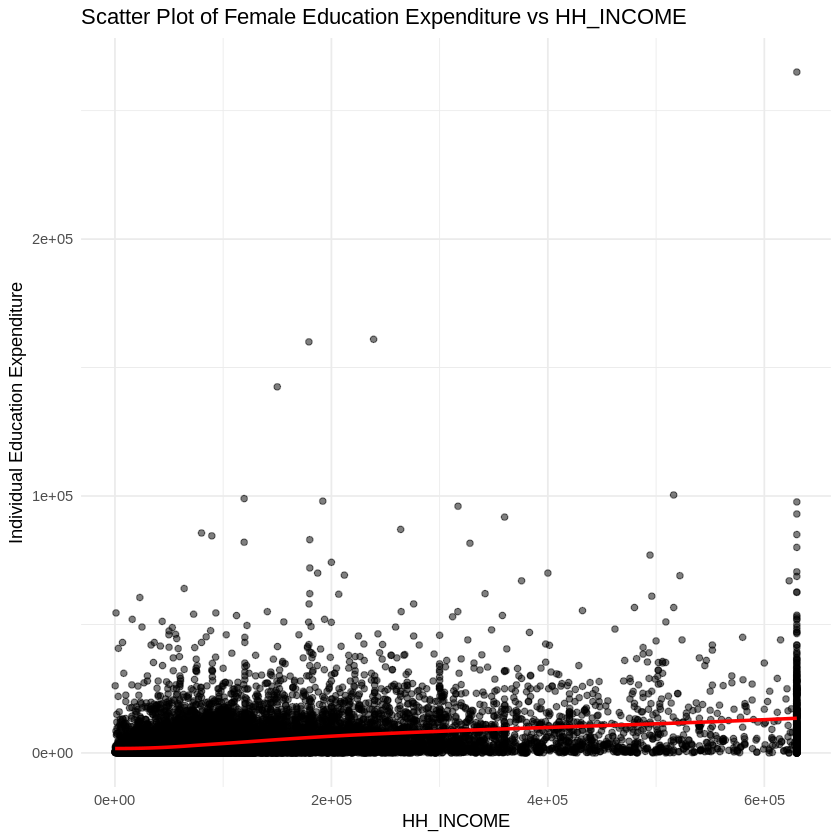

`geom_smooth()` using formula = 'y ~ x'


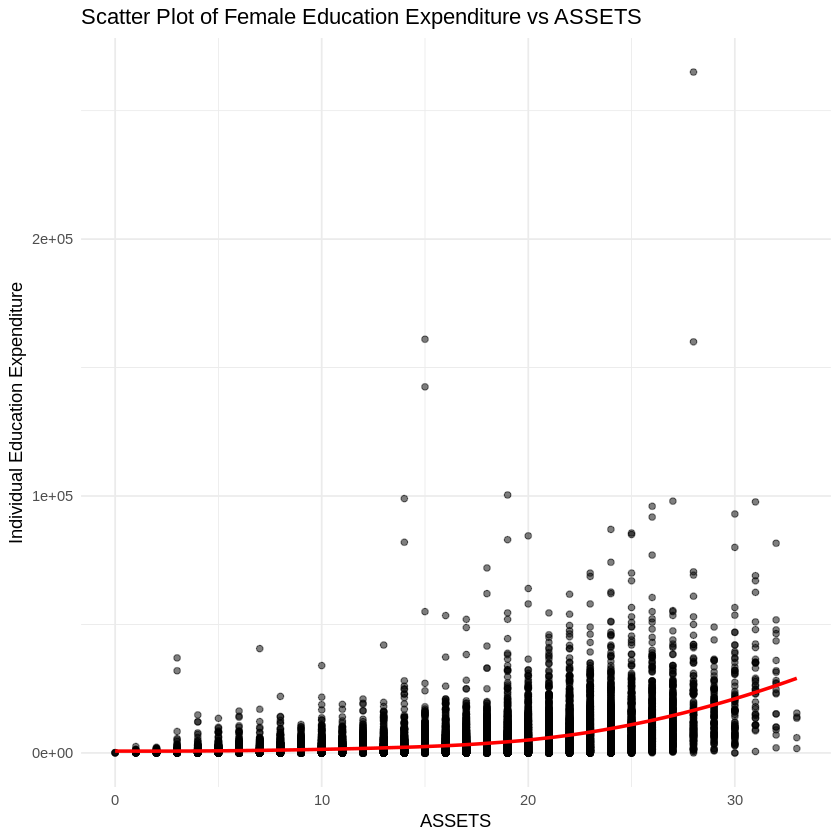

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.495”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.495”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.8873e-15”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”


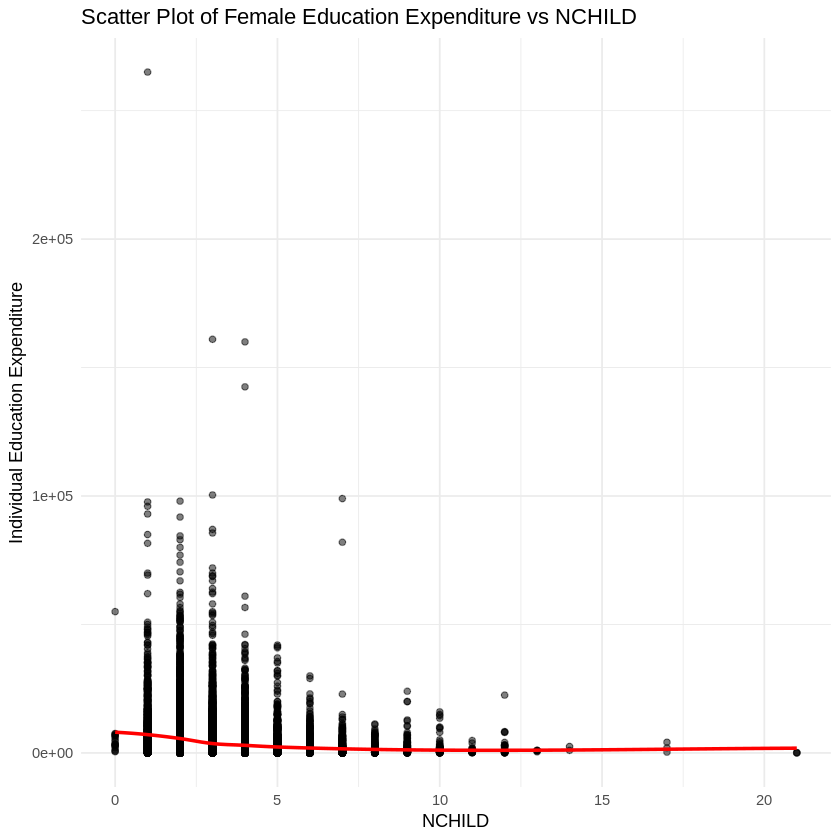

`geom_smooth()` using formula = 'y ~ x'


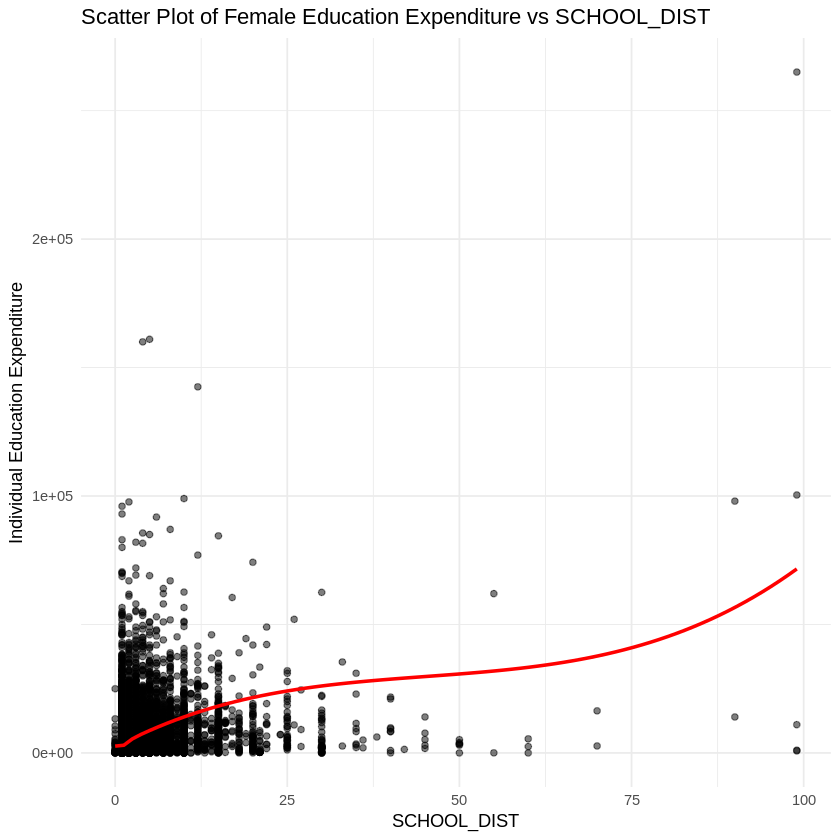

`geom_smooth()` using formula = 'y ~ x'


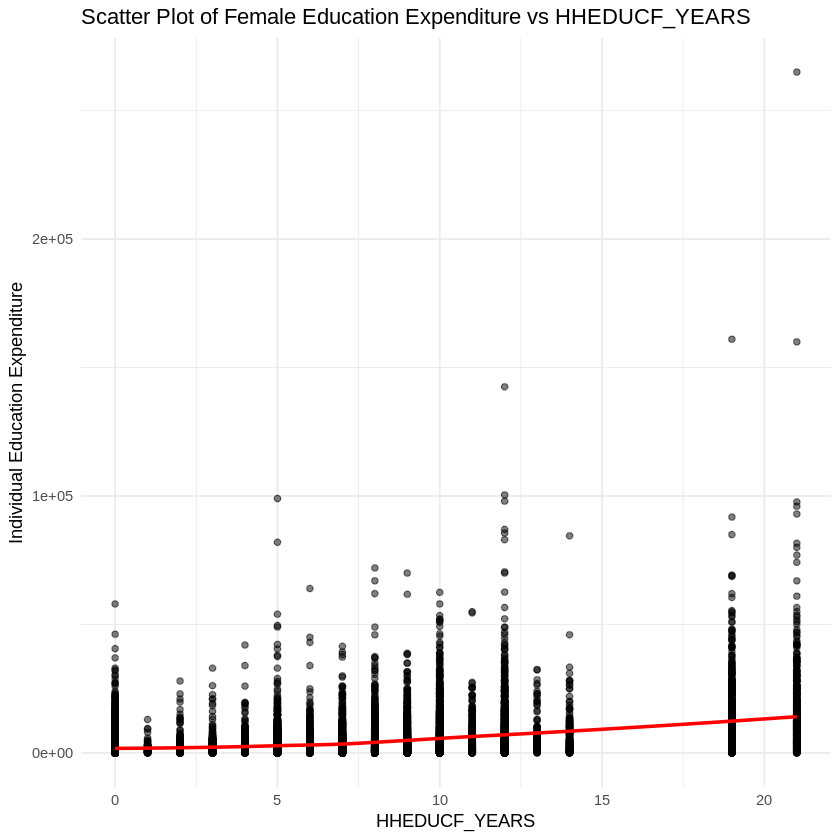

`geom_smooth()` using formula = 'y ~ x'


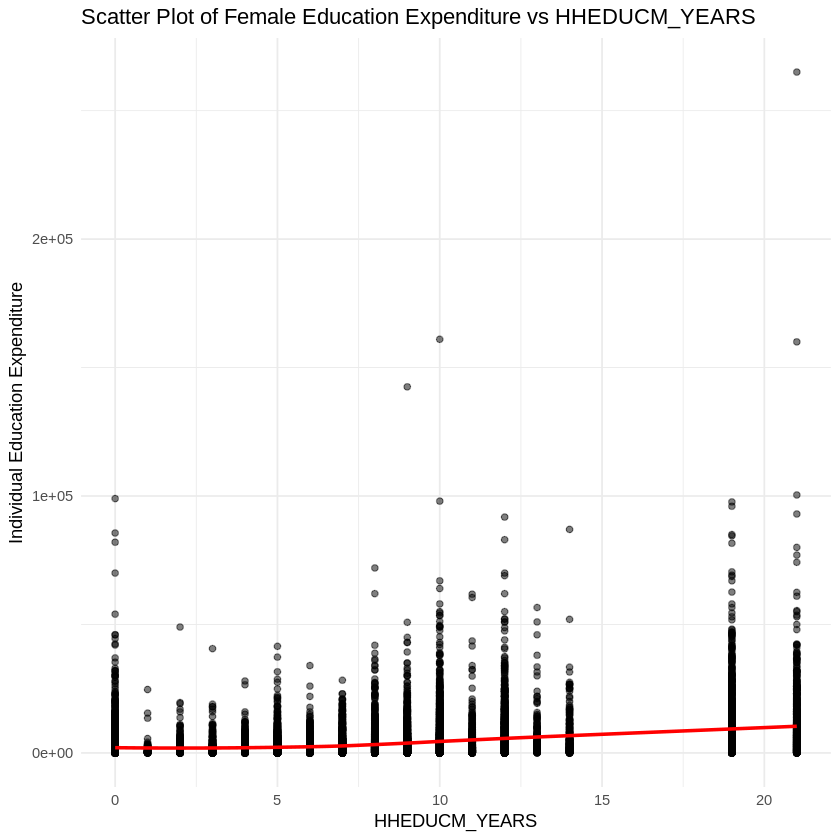

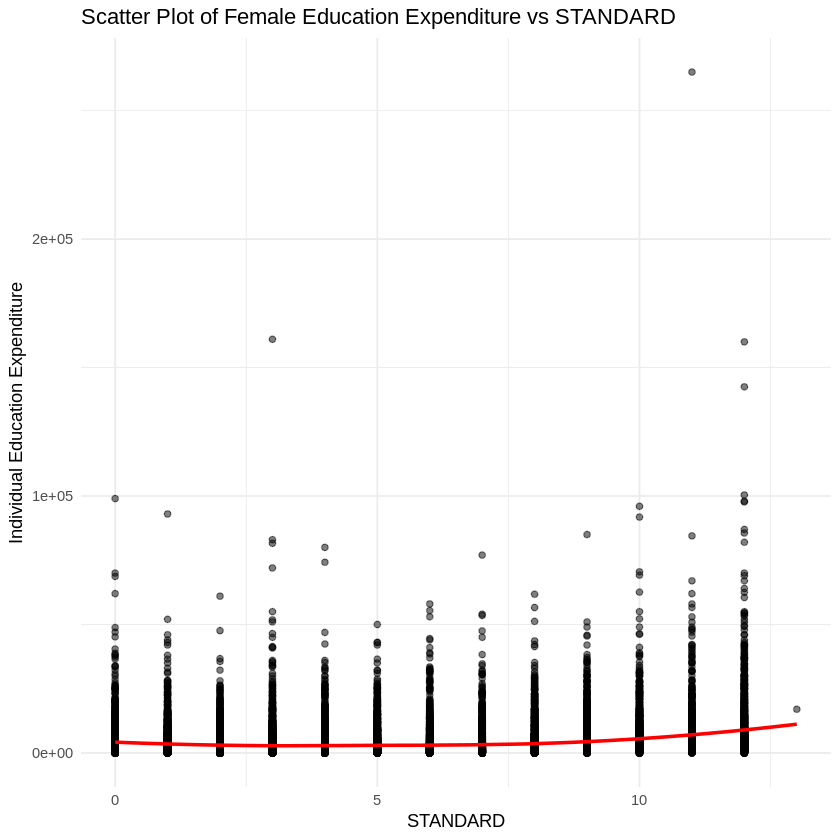

In [ ]:
library(ggplot2)

# Scatter plots to check for non-linearity
variables <- c("HH_INCOME", "ASSETS", "NCHILD", "SCHOOL_DIST", "HHEDUCF_YEARS", "HHEDUCM_YEARS","STANDARD")

# Loop through selected variables and create scatter plots
for (var in variables) {
  p <- ggplot(ind, aes(x = !!sym(var), y = ind_edu_exp)) +
    geom_point(alpha = 0.5) +  # Transparency for better visibility
    geom_smooth(method = "loess", color = "red", se = FALSE) +  # Trend line
    labs(title = paste("Scatter Plot of Female Education Expenditure vs", var),
         x = var, y = "Individual Education Expenditure") +
    theme_minimal()

  print(p)  # Display plot
}

In [ ]:
x_variables <- ind %>%
  select_if(is.numeric) %>%
  select(-ind_edu_exp)

correlation_matrix <- cor(x_variables)

correlation_matrix

,HH_INCOME,URBAN2011,ASSETS,NCHILD,SCHOOL_DIST,STANDARD,FEES_BY_GOVT_DUMMY,SCHOLARSHIP,HHEDUCF_YEARS,HHEDUCM_YEARS,RELIGION_MUSLIM,RELIGION_CHRISTIAN_SIKH,RELIGION_OTHER,CASTE_GENERAL,CASTE_SC_ST_OTHERS,SCHOOL_PRIVATE,SCHOOL_GOVT_AIDED,SCHOLARSHIP_dummy
HH_INCOME,1.000000000,0.211352603,0.541311508,0.040422147,0.07983882,0.04006034,NA,-0.0525844397,0.43162205,0.433604763,-0.014798481,0.1125396207,-0.004832006,0.1772417239,-0.117473042,0.27217395,0.0255254788,-0.164934156
URBAN2011,0.211352603,1.000000000,0.470077269,-0.123888001,-0.03810852,0.03522409,NA,-0.0395780426,0.31471728,0.228438483,0.111992748,-0.0171251662,0.001109492,0.0907382662,-0.105317385,0.27659025,0.0501975614,-0.145448074
ASSETS,0.541311508,0.470077269,1.000000000,-0.156399637,0.11160529,0.12600595,NA,-0.0494659898,0.58822463,0.513265687,0.003006452,0.1383695858,-0.002479876,0.2369135840,-0.213414471,0.41616462,0.0766551708,-0.236718329
NCHILD,0.040422147,-0.123888001,-0.156399637,1.000000000,-0.09178777,-0.10539263,NA,0.0133527698,-0.19336523,-0.080311639,0.160016635,-0.0609971280,-0.035624135,-0.0706730375,0.002620345,-0.08091426,-0.0640650166,0.091858715
SCHOOL_DIST,0.079838824,-0.038108519,0.111605289,-0.091787770,1.00000000,0.19377465,NA,0.0685682862,0.10976824,0.085370913,-0.029892157,0.0417616518,0.010647024,0.0456853569,-0.026020543,0.09623599,0.0391365936,-0.027019728
STANDARD,0.040060340,0.035224092,0.126005946,-0.105392627,0.19377465,1.00000000,NA,0.1981809403,0.01925483,0.047923513,-0.063556544,0.0154642514,0.029733130,0.0541714352,-0.013140648,-0.14565989,0.1086899477,0.153979130
FEES_BY_GOVT_DUMMY,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
SCHOLARSHIP,-0.052584440,-0.039578043,-0.049465990,0.013352770,0.06856829,0.19818094,NA,1.0000000000,-0.07267166,-0.052642842,-0.014914663,0.0006330359,0.002939973,-0.0906547896,0.116648201,-0.11913486,0.0292673841,0.524604648
HHEDUCF_YEARS,0.431622052,0.314717284,0.588224632,-0.193365230,0.10976824,0.01925483,NA,-0.0726716589,1.00000000,0.554648689,-0.050420031,0.0956671226,0.018180270,0.2392352792,-0.173051688,0.34042245,0.0832991703,-0.211773806
HHEDUCM_YEARS,0.433604763,0.228438483,0.513265687,-0.080311639,0.08537091,0.04792351,NA,-0.0526428417,0.55464869,1.000000000,-0.071964909,0.0272780832,-0.005929571,0.1988970483,-0.156546711,0.30332348,0.0298281370,-0.158508569


In [ ]:
ind$log_ind_edu_exp <- log(ind$ind_edu_exp + 1)

In [ ]:
ind$log_SCHOOL_DIST <- log(ind$SCHOOL_DIST+1)

In [ ]:
head(ind)

,HH_INCOME,URBAN2011,ASSETS,NCHILD,SCHOOL_DIST,STANDARD,FEES_BY_GOVT_DUMMY,SCHOLARSHIP,ind_edu_exp,HHEDUCF_YEARS,⋯,RELIGION_MUSLIM,RELIGION_CHRISTIAN_SIKH,RELIGION_OTHER,CASTE_GENERAL,CASTE_SC_ST_OTHERS,SCHOOL_PRIVATE,SCHOOL_GOVT_AIDED,SCHOLARSHIP_dummy,log_ind_edu_exp,log_SCHOOL_DIST
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176100,0,20,5,3,6,0,0,10600,8,⋯,1,0,0,0,0,1,0,0,9.268704,1.3862944
2,176100,0,20,5,3,0,0,0,2800,8,⋯,1,0,0,0,0,1,0,0,7.937732,1.3862944
3,182340,0,22,4,3,10,0,0,3900,11,⋯,1,0,0,0,0,1,0,0,8.268988,1.3862944
4,182340,0,22,4,3,5,0,0,2680,11,⋯,1,0,0,0,0,1,0,0,7.893945,1.3862944
5,90760,0,16,3,3,8,0,0,1150,0,⋯,1,0,0,1,0,0,0,0,7.048386,1.3862944
6,152100,0,12,4,1,0,0,0,220,9,⋯,1,0,0,0,0,0,0,0,5.398163,0.6931472


In [ ]:
ind <- ind %>%
  select(-SCHOLARSHIP,-FEES_BY_GOVT_DUMMY)

In [ ]:
write.csv(ind,"ind_final.csv")

In [ ]:
model <- lm(log_ind_edu_exp ~  HH_INCOME+URBAN2011 +ASSETS+log_SCHOOL_DIST+ STANDARD+
               HHEDUCF_YEARS + SCHOLARSHIP_dummy + NCHILD+
            HHEDUCM_YEARS + RELIGION_MUSLIM +
             RELIGION_CHRISTIAN_SIKH +RELIGION_OTHER + SCHOOL_PRIVATE +SCHOOL_GOVT_AIDED
             +CASTE_GENERAL+ CASTE_SC_ST_OTHERS, data = ind)

# View summary of regression results
summary(model)


Call:
lm(formula = log_ind_edu_exp ~ HH_INCOME + URBAN2011 + ASSETS + 
    log_SCHOOL_DIST + STANDARD + HHEDUCF_YEARS + SCHOLARSHIP_dummy + 
    NCHILD + HHEDUCM_YEARS + RELIGION_MUSLIM + RELIGION_CHRISTIAN_SIKH + 
    RELIGION_OTHER + SCHOOL_PRIVATE + SCHOOL_GOVT_AIDED + CASTE_GENERAL + 
    CASTE_SC_ST_OTHERS, data = ind)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5564  -0.4440   0.2236   0.8361   4.8020 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.495e+00  4.751e-02  94.616  < 2e-16 ***
HH_INCOME                4.841e-07  1.043e-07   4.641 3.48e-06 ***
URBAN2011                1.619e-01  2.644e-02   6.122 9.40e-10 ***
ASSETS                   4.891e-02  2.567e-03  19.058  < 2e-16 ***
log_SCHOOL_DIST          3.851e-01  2.153e-02  17.886  < 2e-16 ***
STANDARD                 1.464e-01  3.242e-03  45.159  < 2e-16 ***
HHEDUCF_YEARS            2.341e-02  2.535e-03   9.235  < 2e-16 ***
SCHOLARSHIP_dummy 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


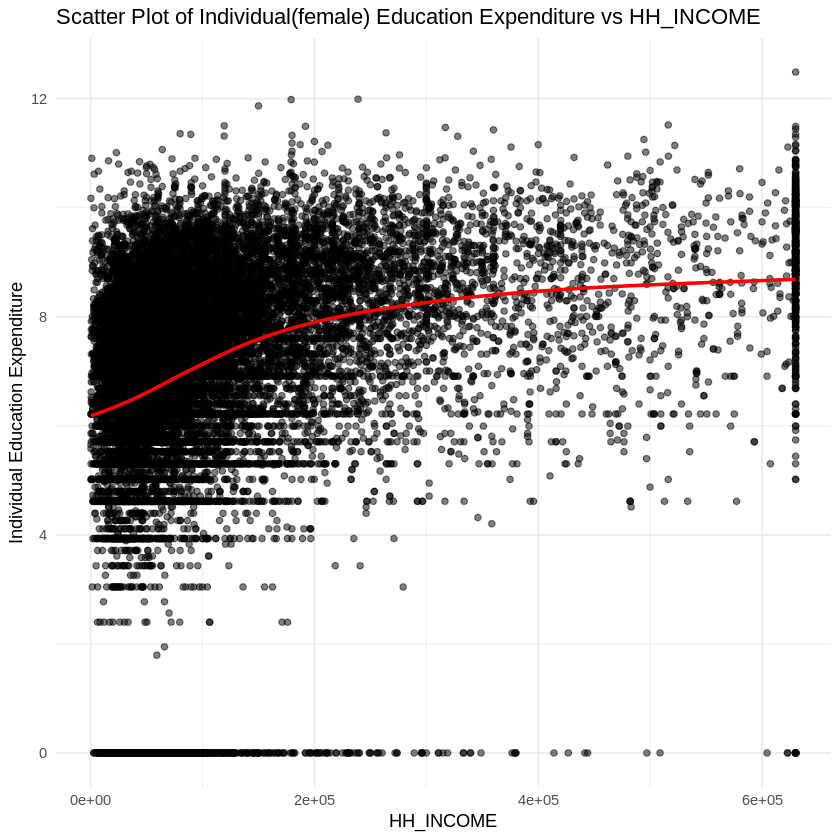

`geom_smooth()` using formula = 'y ~ x'


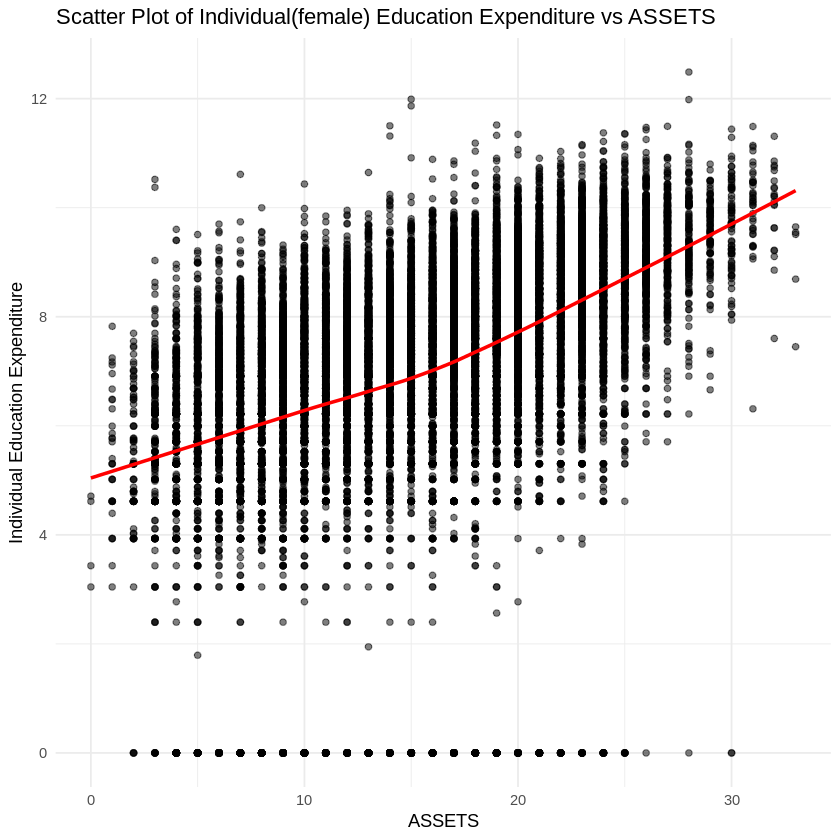

`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.023026”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.1216”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.0269e-14”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.1644”


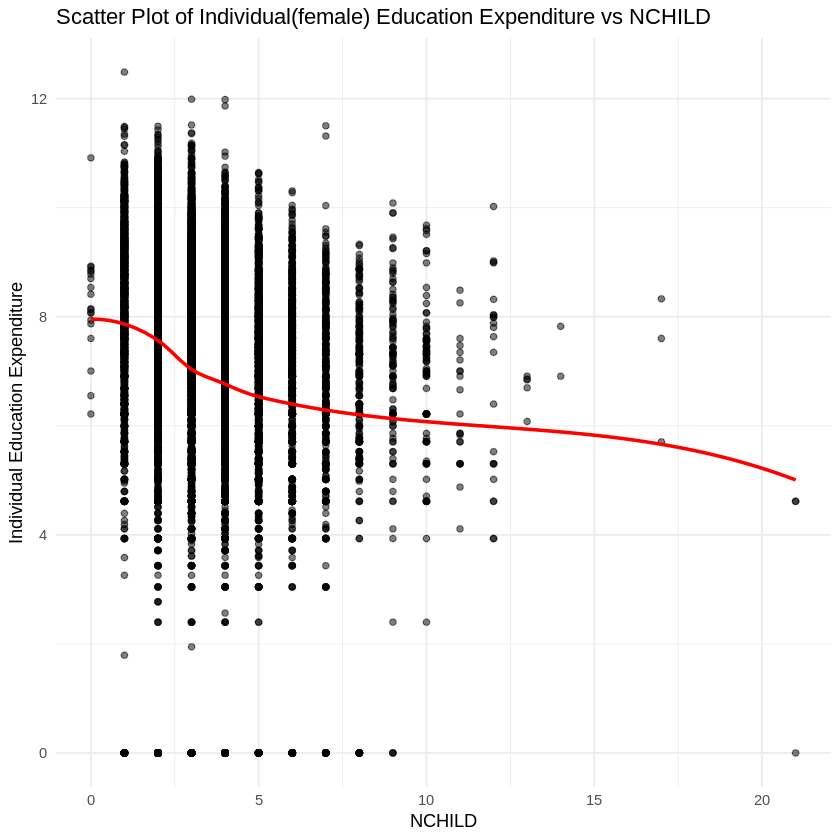

`geom_smooth()` using formula = 'y ~ x'


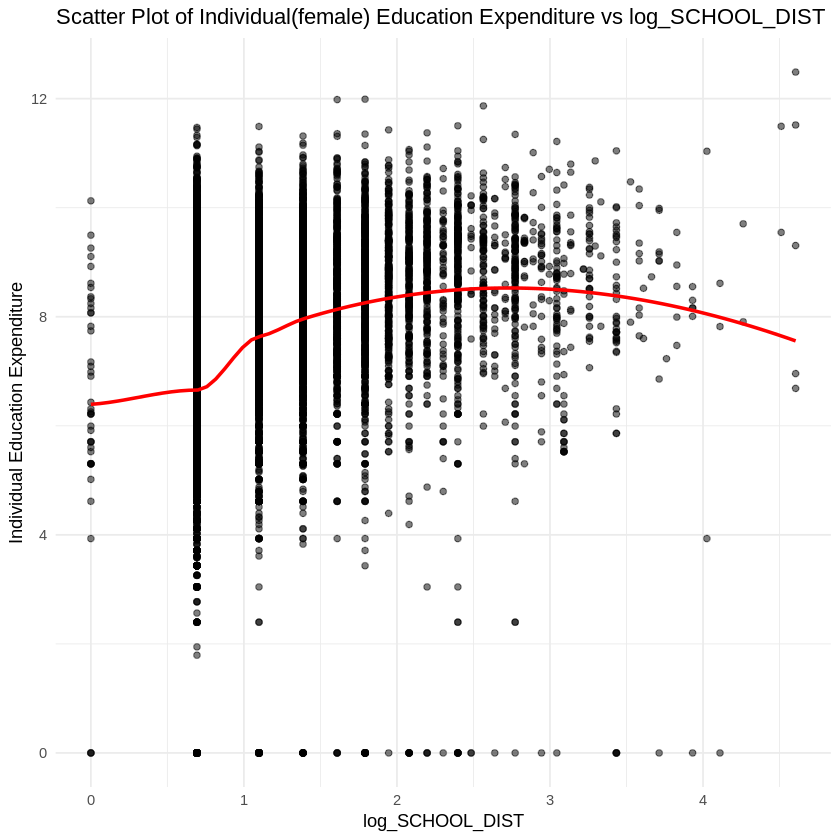

`geom_smooth()` using formula = 'y ~ x'


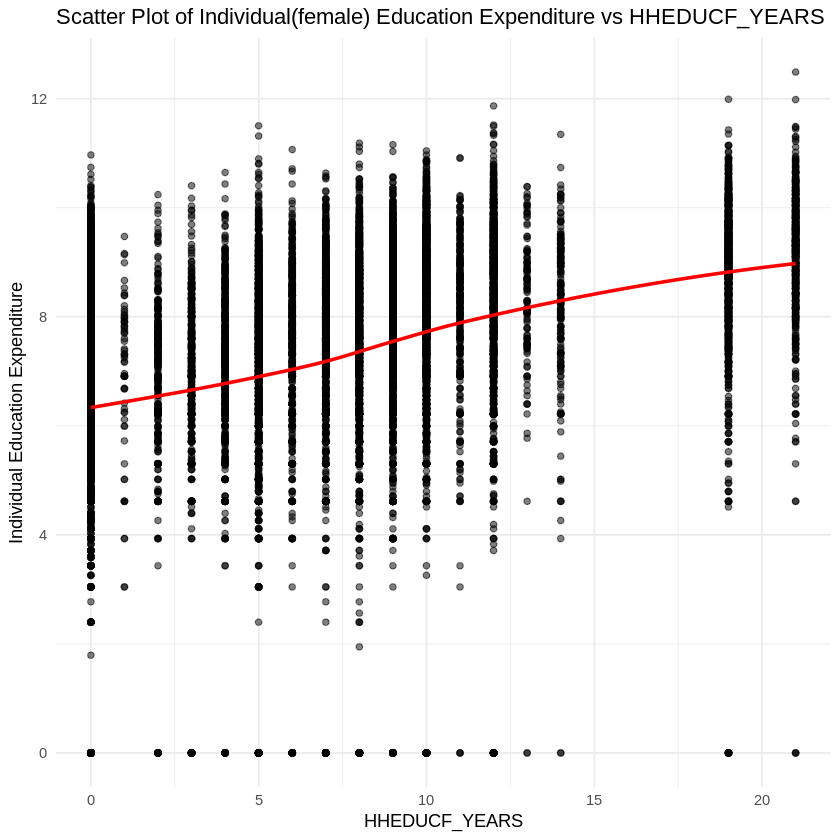

`geom_smooth()` using formula = 'y ~ x'


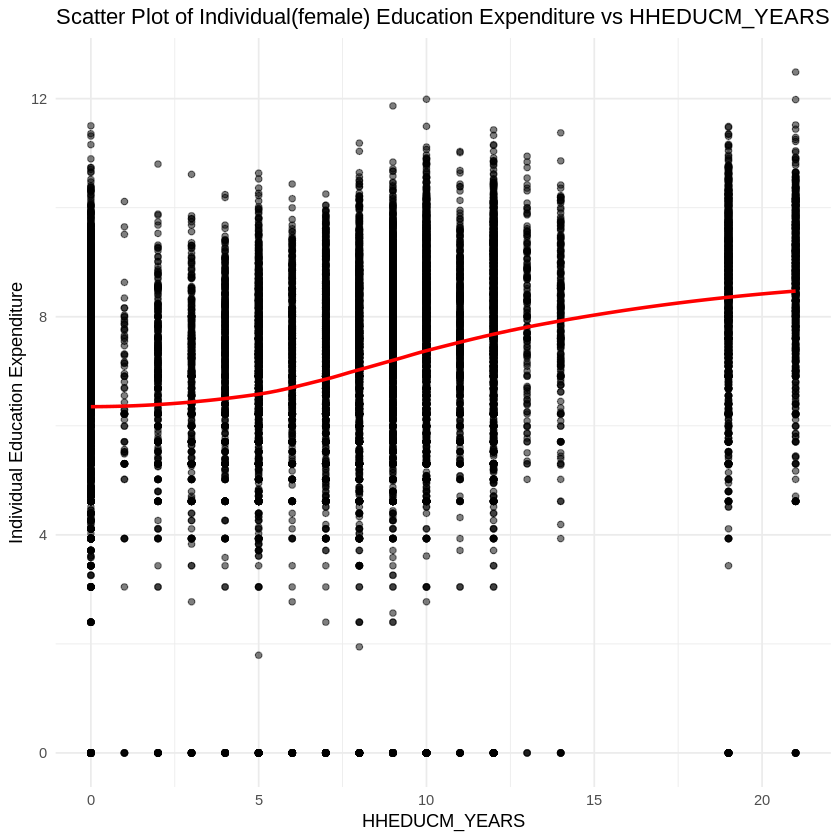

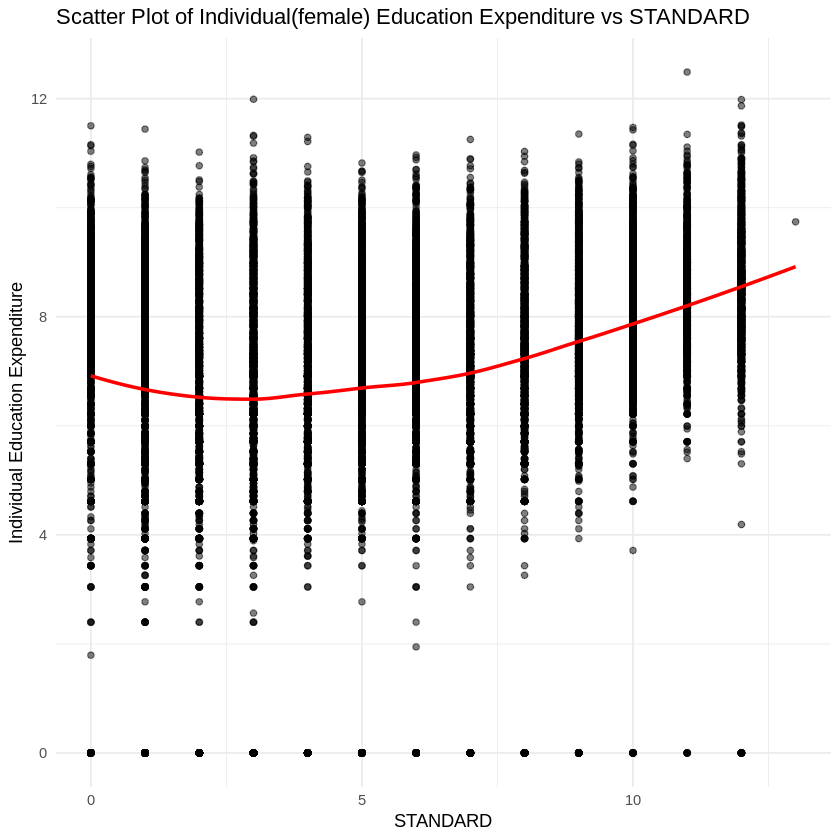

In [ ]:
library(ggplot2)

# Scatter plots to check for non-linearity
variables <- c("HH_INCOME", "ASSETS", "NCHILD", "log_SCHOOL_DIST", "HHEDUCF_YEARS", "HHEDUCM_YEARS","STANDARD")

# Loop through selected variables and create scatter plots
for (var in variables) {
  p <- ggplot(ind, aes(x = !!sym(var), y = log_ind_edu_exp)) +
    geom_point(alpha = 0.5) +  # Transparency for better visibility
    geom_smooth(method = "loess", color = "red", se = FALSE) +  # Trend line
    labs(title = paste("Scatter Plot of Individual(female) Education Expenditure vs", var),
         x = var, y = "Individual Education Expenditure") +
    theme_minimal()

  print(p)  # Display plot
}

In [ ]:

vif_values <- vif(model)
print(vif_values)
high_vif_variables <- names(vif_values[vif_values > 5])

if (length(high_vif_variables) > 0) {
  cat("Variables with high VIFs (potential multicollinearity):\n")
  print(high_vif_variables)
} else {
  cat("No variables with high VIFs detected.\n")
}

              HH_INCOME               URBAN2011                  ASSETS 
               1.560155                1.392755                2.419108 
        log_SCHOOL_DIST                STANDARD           HHEDUCF_YEARS 
               1.180986                1.212535                1.889801 
      SCHOLARSHIP_dummy                  NCHILD           HHEDUCM_YEARS 
               1.172432                1.137513                1.646568 
        RELIGION_MUSLIM RELIGION_CHRISTIAN_SIKH          RELIGION_OTHER 
               1.150515                1.065308                1.021964 
         SCHOOL_PRIVATE       SCHOOL_GOVT_AIDED           CASTE_GENERAL 
               1.440446                1.080584                1.298751 
     CASTE_SC_ST_OTHERS 
               1.336861 
No variables with high VIFs detected.


TESTS FOR ASSUMPTIONS


In [ ]:
if(!require(lmtest)){install.packages("lmtest")}

library(lmtest)
#Breusch-Pagan test
bptest(model)

Loading required package: lmtest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lmtest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  model
BP = 464.52, df = 16, p-value < 2.2e-16


In [ ]:
if(!require(sandwich)){install.packages("sandwich")}

Loading required package: sandwich

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘sandwich’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



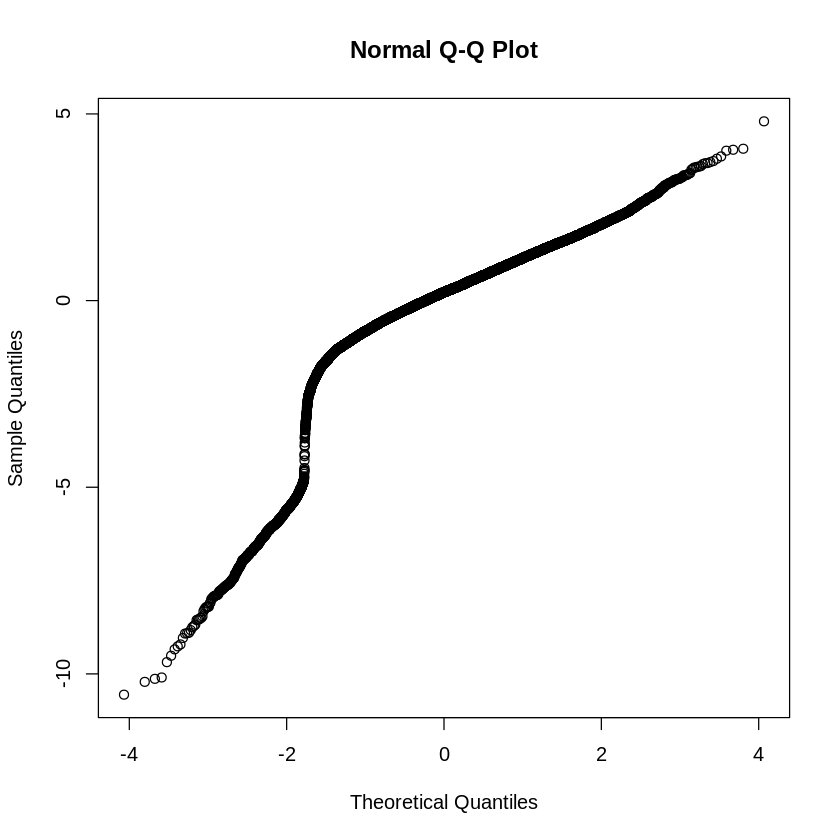


	Durbin-Watson test

data:  model
DW = 1.3804, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


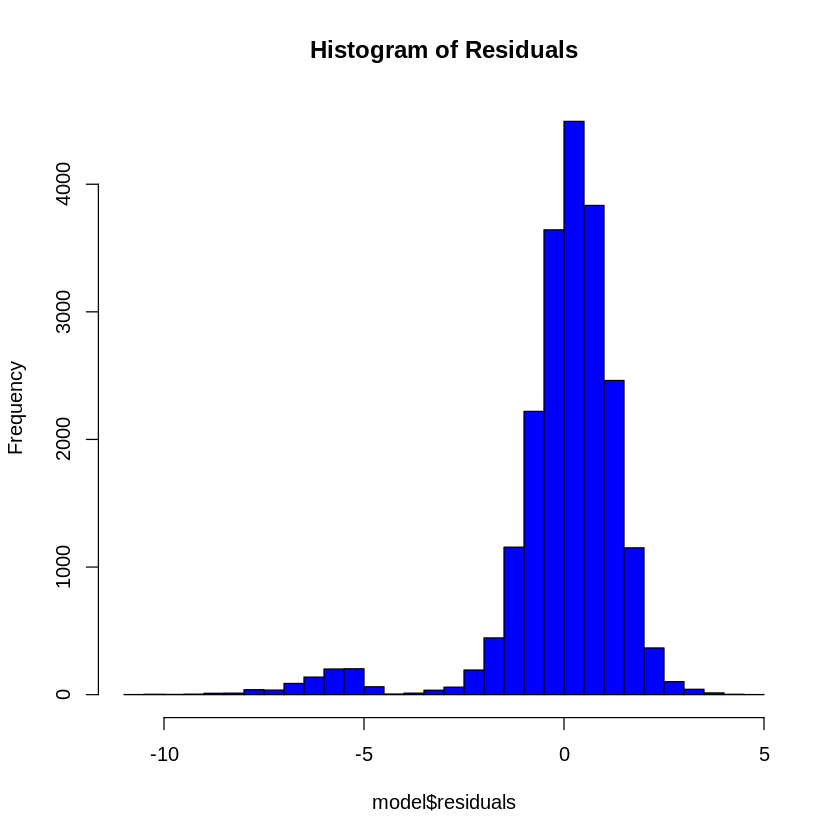

In [ ]:
# Normality of Residuals
qqnorm(model$residuals)

hist(model$residuals, breaks = 50, main = "Histogram of Residuals", col = "blue")
# Independence of Errors (Durbin-Watson test)
dwtest(model)


In [ ]:
library(sandwich)
robust_se <- coeftest(model, vcov = vcovHC(model, type = "HC3"))
robust_se


t test of coefficients:

                           Estimate  Std. Error  t value  Pr(>|t|)    
(Intercept)              4.4952e+00  4.8094e-02  93.4678 < 2.2e-16 ***
HH_INCOME                4.8409e-07  9.8638e-08   4.9077 9.282e-07 ***
URBAN2011                1.6188e-01  2.7165e-02   5.9593 2.574e-09 ***
ASSETS                   4.8915e-02  2.5723e-03  19.0156 < 2.2e-16 ***
log_SCHOOL_DIST          3.8510e-01  2.3224e-02  16.5819 < 2.2e-16 ***
STANDARD                 1.4640e-01  3.3014e-03  44.3441 < 2.2e-16 ***
HHEDUCF_YEARS            2.3412e-02  2.3926e-03   9.7854 < 2.2e-16 ***
SCHOLARSHIP_dummy       -8.7603e-02  2.7651e-02  -3.1681 0.0015365 ** 
NCHILD                  -7.8353e-02  6.4431e-03 -12.1608 < 2.2e-16 ***
HHEDUCM_YEARS            6.7332e-03  2.1461e-03   3.1375 0.0017065 ** 
RELIGION_MUSLIM         -1.1744e-01  3.5445e-02  -3.3132 0.0009241 ***
RELIGION_CHRISTIAN_SIKH  5.2610e-02  4.4287e-02   1.1879 0.2348751    
RELIGION_OTHER          -7.0366e-02  1.0172e-01  -0